In [2]:
import time
import random

total_time = [0, 0, 0, 0,0]
total_timem = [0, 0, 0, 0,0]
total_timeb = [0, 0, 0, 0,0]
recursive_calls = [0, 0, 0,0, 0]
recursive_callsm = [0, 0, 0, 0,0]
recursive_callsr = [0, 0, 0, 0,0]
dp_mem = [0, 0, 0, 0,0]
dp_bottom_up = [0, 0, 0, 0,0]

def knapsack_recursive(wt, val, W, n, i):
    recursive_calls[i] += 1
    if n == 0 or W == 0:
        return 0
    elif wt[i][n - 1] <= W:
        return max(val[i][n - 1] + knapsack_recursive(wt, val, W - wt[i][n - 1], n - 1, i), knapsack_recursive(wt, val, W, n - 1, i))
    else:
        return knapsack_recursive(wt, val, W, n - 1, i)

def knapsack_memoize(wt, val, W, n, memo, i):
    recursive_callsm[i] += 1
    if n == 0 or W == 0:
        return 0
    elif memo[n][W] != -1:
        return memo[n][W]
    elif wt[i][n - 1] <= W:
        memo[n][W] = max(val[i][n - 1] + knapsack_memoize(wt, val, W - wt[i][n - 1], n - 1, memo, i), knapsack_memoize(wt, val, W, n - 1, memo, i))
    else:
        memo[n][W] = knapsack_memoize(wt, val, W, n - 1, memo, i)
    return memo[n][W]

def knapsack_bottomup(wt, val, W, n, i):
    dp = [[-1 for _ in range(W + 1)] for _ in range(n + 1)]
    count = 0
    for j in range(n + 1):
        for k in range(W + 1):
            if j == 0 or k == 0:
                dp[j][k] = 0
                count += 1
            elif wt[i][j - 1] <= k:
                recursive_callsr[i] += 2
                dp[j][k] = max(val[i][j - 1] + dp[j - 1][k - wt[i][j - 1]], dp[j - 1][k])
                count += 1
            else:
                recursive_callsr[i] += 1
                dp[j][k] = dp[j - 1][k]
                count += 1
    dp_bottom_up[i] = count

arr = [5, 10, 20, 26, 30]


wt = []
val = []
W = []

for i in range(len(arr)):
    wt.append([random.randint(1, 20) for _ in range(arr[i])])
    val.append([random.randint(1, 20) for _ in range(arr[i])])
    W.append(random.randint(50, 100))
    n = arr[i]


    start_time = time.perf_counter()
    result = knapsack_recursive(wt, val, W[i], n, i)
    end_time = time.perf_counter()
    execution_time = end_time - start_time
    total_time[i] = execution_time
    print(result)
    print("Total time of recursion:", execution_time)
    print("Recursive Calls for input size recursion", i, ":", recursive_calls[i])
    print("")


    memo = [[-1 for _ in range(W[i] + 1)] for _ in range(n + 1)]
    start_time = time.perf_counter()
    result = knapsack_memoize(wt, val, W[i], n, memo, i)
    end_time = time.perf_counter()
    execution_timem = end_time - start_time
    total_timem[i] = execution_timem
    print( result)
    print("Total time of memoization:", execution_timem)
    print("Recursive Calls for input size memoization", i, ":", recursive_callsm[i])
    print("")


    count = sum([1 for row in memo for value in row if value != -1])
    dp_mem[i] = count


    dp = [[-1 for _ in range(W[i] + 1)] for _ in range(n + 1)]
    start_time = time.perf_counter()
    result = knapsack_bottomup(wt, val, W[i], n, i)
    end_time = time.perf_counter()
    execution_timeb = end_time - start_time
    total_timeb[i] = execution_timeb
    print( result)
    print("Total time of Bottom Up:", execution_timeb)
    print("Recursive Calls for input size bottom-up", i, ":", recursive_callsr[i])
    print("")
    print(10*"----------------------")


print(dp_mem)
print(dp_bottom_up)


68
Total time of recursion: 3.289799998640319e-05
Recursive Calls for input size recursion 0 : 63

68
Total time of memoization: 4.936899999563593e-05
Recursive Calls for input size memoization 0 : 63

None
Total time of Bottom Up: 0.00021328000001119563
Recursive Calls for input size bottom-up 0 : 476

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
65
Total time of recursion: 0.0008993120000013732
Recursive Calls for input size recursion 1 : 2047

65
Total time of memoization: 0.0002628489999949579
Recursive Calls for input size memoization 1 : 455

None
Total time of Bottom Up: 0.0004963070000059133
Recursive Calls for input size bottom-up 1 : 1229

----------------------------------------------------------------------------------------------------------------------------------------------------------------------

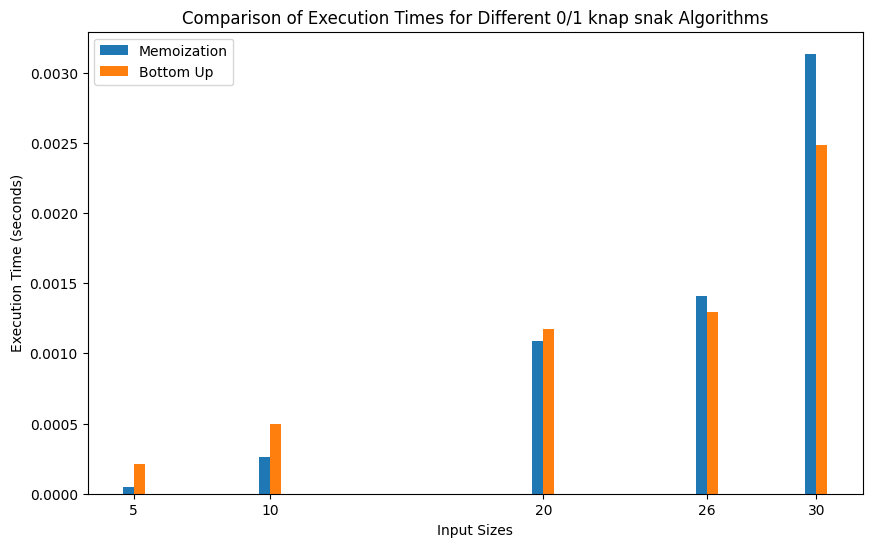

In [3]:
import matplotlib.pyplot as plt
arr = [5, 10, 20 , 26,30]
functions = [ 'Memoization', 'Bottom Up']

# Execution times for each function
execution_times = [ total_timem, total_timeb]

# Create a bar graph
plt.figure(figsize=(10, 6))
bar_width = 0.4
bar_positions = [x for x in arr]

for i, func in enumerate(functions):
    plt.bar([x + i * bar_width for x in bar_positions], execution_times[i], width=bar_width, align='center', label=func)

# Set labels and title
plt.xlabel('Input Sizes')
plt.ylabel('Execution Time (seconds)')
plt.title('Comparison of Execution Times for Different 0/1 knap snak Algorithms')
plt.xticks([x + 0.2 for x in arr], arr)
plt.legend()

# Show the plot
plt.show()





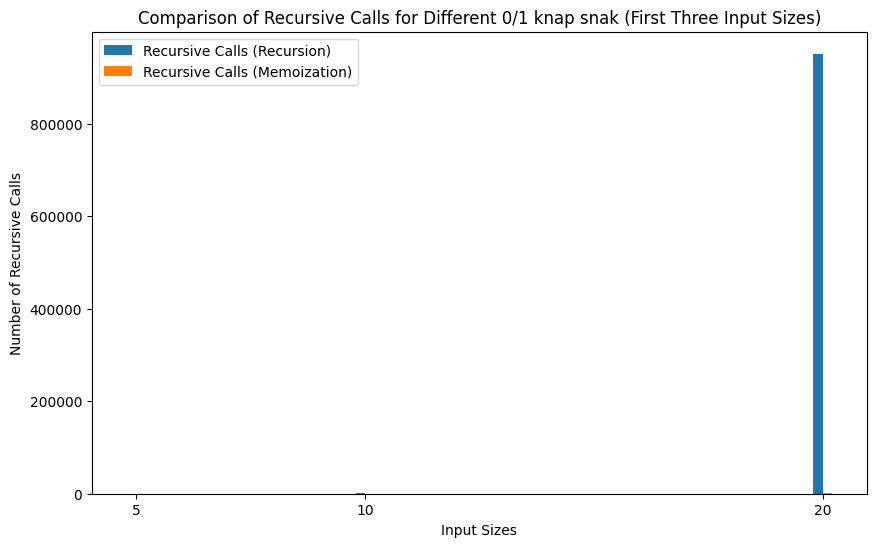

In [4]:
plt.figure(figsize=(10, 6))
bar_width = 0.2
bar_positions = [x for x in arr[:3]]

plt.bar([x - bar_width / 2 for x in bar_positions], recursive_calls[:3], width=bar_width, align='center', label='Recursive Calls (Recursion)')
plt.bar([x + bar_width / 2 for x in bar_positions], recursive_callsm[:3], width=bar_width, align='center', label='Recursive Calls (Memoization)')

# Set labels and title
plt.xlabel('Input Sizes')
plt.ylabel('Number of Recursive Calls')
plt.title('Comparison of Recursive Calls for Different 0/1 knap snak (First Three Input Sizes)')
plt.xticks(bar_positions, arr[:3])
plt.legend()

# Show the plot
plt.show()

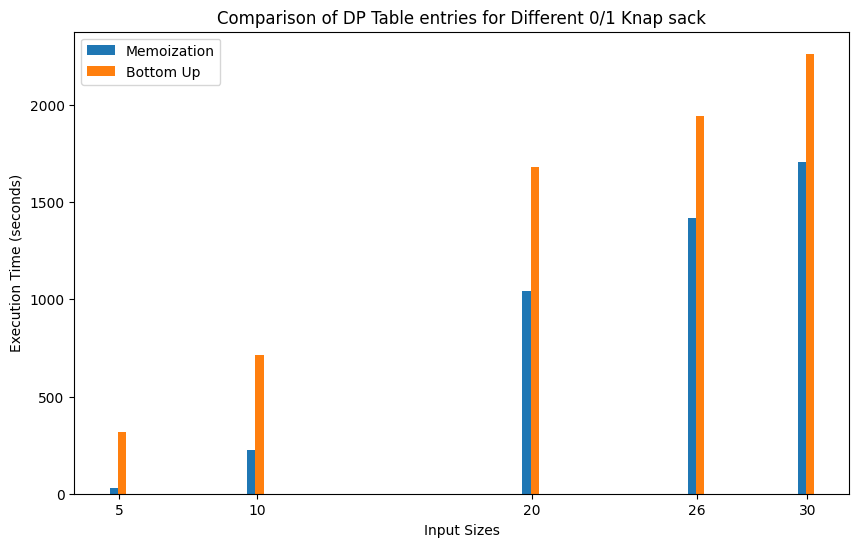

In [5]:
arr = [5, 10, 20 ,26,30]
functions = [ 'Memoization', 'Bottom Up']

# Execution times for each function
execution_times = [ dp_mem, dp_bottom_up]

# Create a bar graph
plt.figure(figsize=(10, 6))
bar_width = 0.3
bar_positions = [x for x in arr]

for i, func in enumerate(functions):
    plt.bar([x + i * bar_width for x in bar_positions], execution_times[i], width=bar_width, align='center', label=func)

# Set labels and title
plt.xlabel('Input Sizes')
plt.ylabel('Execution Time (seconds)')
plt.title('Comparison of DP Table entries for Different 0/1 Knap sack')
plt.xticks([x + 0.2 for x in arr], arr)
plt.legend()

# Show the plot
plt.show()